# **Unveiling the Magic of Image Processing with GPT-4: A Comprehensive Guide**

In the realm of artificial intelligence, images speak volumes. With an ever-expanding universe of data, images have become a cornerstone in the fortress of machine learning and data analysis. But how do we transform a collection of pixels into meaningful insights? How do we unveil the stories that images whisper in the digital wind? Welcome to a journey where we unleash the potential of image data using the remarkable capabilities of GPT-4.

In this illuminating guide, we will walk through a forest of techniques and methods that breathe life into image data. Our adventure begins with the basics – loading and visualizing images. With curiosity as our compass, we wander through the intricate pathways of image preprocessing, exploring realms such as resizing, grayscale conversion, and normalization. But the journey doesn’t stop there. The horizon expands as we delve into the mystical lands of data augmentation, enhancing our dataset with a sprinkle of diversity to fortify our models against the winds of overfitting.

Guided by GPT-4, our expedition reaches exciting destinations like clustering, where we unveil patterns and groups hidden within the pixels. A treasure trove of insights awaits as we navigate the waters of anomaly detection, identifying the unique and unusual in our image odyssey.

So, buckle up for an enlightening voyage where each pixel unveils a fragment of the story, and GPT-4 acts as our steadfast companion, navigating us through the magical landscapes of image processing and analysis. Together, let’s uncover the tales that images whisper in the vast echoes of the digital universe!



In [1]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/images.zip'

# Directory where the files will be extracted
extracted_dir_path = '/content/images'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# Listing the files in the extracted directory
extracted_files = os.listdir(extracted_dir_path)
extracted_files[:5], len(extracted_files)  # Showing the first 5 files and the total number of files


(['__MACOSX', 'images'], 2)

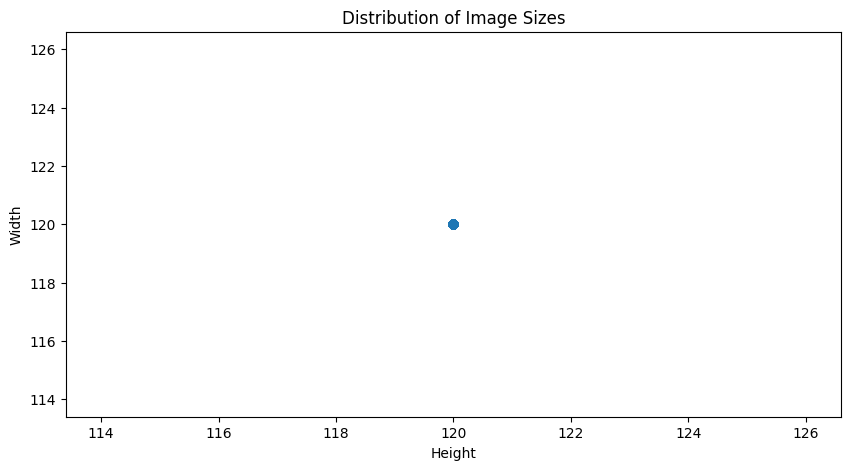

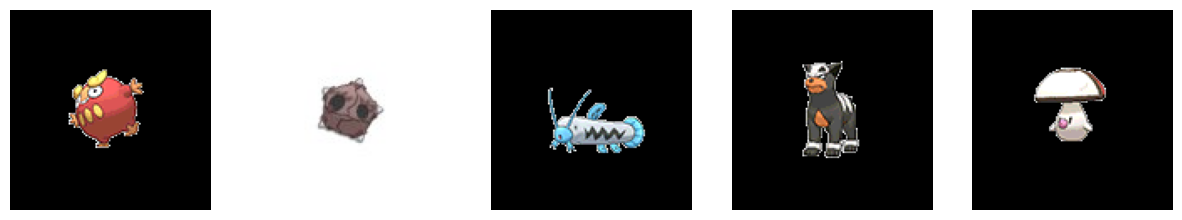

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the images
image_dir = '/content/images/images'

# List to store image sizes
image_sizes = []

# Reading each image and getting their sizes
for image_name in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_name)
    image = cv2.imread(image_path)
    if image is not None:
        height, width, _ = image.shape
        image_sizes.append((height, width))

# Converting list of sizes to a numpy array
image_sizes = np.array(image_sizes)

# Plotting the distribution of image sizes
plt.figure(figsize=(10, 5))
plt.scatter(image_sizes[:, 0], image_sizes[:, 1])
plt.title('Distribution of Image Sizes')
plt.xlabel('Height')
plt.ylabel('Width')
plt.show()

# Function to visualize some images
def visualize_images(image_dir, num_images=5):
    image_names = os.listdir(image_dir)[:num_images]
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(image_names):
        image_path = os.path.join(image_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting from BGR to RGB
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Visualizing some images
visualize_images(image_dir)


In [3]:
import cv2
import numpy as np

def preprocess_images(image_dir, target_size=(224, 224)):
    """
    Function to preprocess the images by resizing and normalization.
    """
    preprocessed_images = []
    image_names = os.listdir(image_dir)

    for image_name in image_names:
        image_path = os.path.join(image_dir, image_name)
        image = cv2.imread(image_path)

        if image is not None:
            # Resizing the image
            image = cv2.resize(image, target_size)

            # Normalizing the image
            image = image / 255.0

            preprocessed_images.append(image)

    return np.array(preprocessed_images)

# Preprocessing the images
preprocessed_images = preprocess_images(image_dir)

# Printing the shape to confirm
print(f"Number of images: {preprocessed_images.shape[0]}")
print(f"Image shape: {preprocessed_images.shape[1:]}")


Number of images: 809
Image shape: (224, 224, 3)


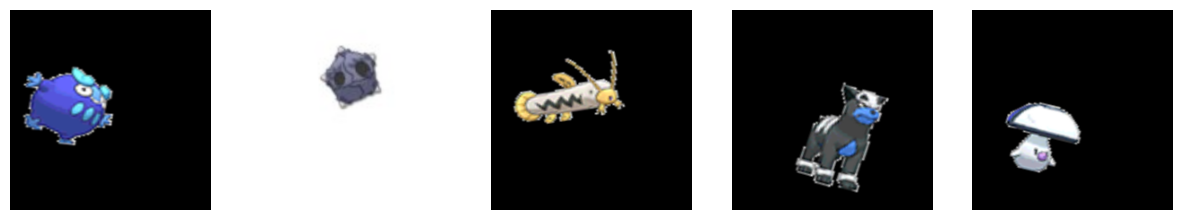

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_images(images, batch_size=32):
    """
    Function to perform data augmentation on the images.
    """
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    augmented_images = datagen.flow(images, batch_size=batch_size, shuffle=False)
    return augmented_images

# Performing data augmentation on the preprocessed images
augmented_images = augment_images(preprocessed_images)

# Visualizing some augmented images
augmented_image_batch = next(augmented_images)
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_image_batch[i])
    plt.axis('off')
plt.show()


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Change the output layer based on your problem
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Customize the parameters
    return model

# Creating the model
model = create_cnn_model(input_shape=(224, 224, 3))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def evaluate_model(model, X_test, y_test):
    """
    Function to evaluate the model and print a classification report and confusion matrix.
    """
    # Getting predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Printing classification report
    print(classification_report(y_test, y_pred_classes))

    # Plotting confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Assuming X_test and y_test are your testing data and labels
# evaluate_model(model, X_test, y_test)


In [7]:
!pip install keras-tuner

from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(hp):
    model = Sequential()

    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
                     kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
                     activation='relu',
                     input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
                     kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
                    activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,
                     directory='output',
                     project_name='ImageClassifier')

# Assuming X_train and y_train are your training data and labels
# tuner.search(X_train, y_train, epochs=5, validation_split=0.2)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 26.1 MB/s eta 0:00:00
Using TensorFlow backend


<ipython-input-7-f027f097107e>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Data Augmentation Techniques
Rotation: Rotate the image by a certain angle.
Flipping: Horizontally or vertically flip the image.
Scaling: Zoom in or out on the image.
Translation: Shift the image horizontally or vertically.
Here’s some code illustrating data augmentation using the PIL (Python Imaging Library):

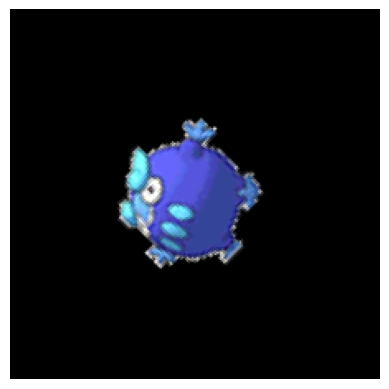

In [13]:
from PIL import ImageEnhance, ImageFilter

def augment_image(image, rotation_angle=45, flip_horizontal=False, flip_vertical=False):
    """
    Function to augment a single image. The augmentation steps include rotation and flipping.
    """
    # Rotating the image
    augmented_image = image.rotate(rotation_angle)

    # Flipping the image horizontally if required
    if flip_horizontal:
        augmented_image = ImageOps.mirror(augmented_image)

    # Flipping the image vertically if required
    if flip_vertical:
        augmented_image = ImageOps.flip(augmented_image)

    return augmented_image

# Applying the augmentation steps to the first image and displaying it
augmented_image = augment_image(Image.fromarray((preprocessed_images[0] * 255).astype(np.uint8)))
plt.imshow(augmented_image)
plt.axis('off')
plt.show()


In this code:

The augment_image function takes an image and various augmentation options. It returns the augmented image.
You can customize the augmentation by modifying the parameters like rotation_angle, flip_horizontal, and flip_vertical.


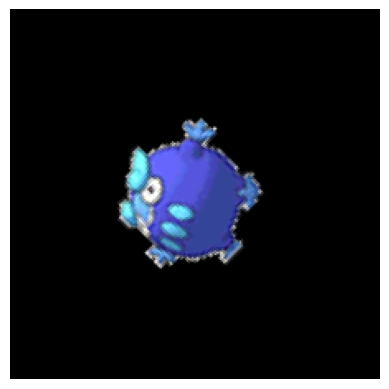

In [14]:
from PIL import ImageEnhance, ImageFilter

def augment_image(image, rotation_angle=45, flip_horizontal=False, flip_vertical=False):
    """
    Function to augment a single image. The augmentation steps include rotation and flipping.
    """
    # Rotating the image
    augmented_image = image.rotate(rotation_angle)

    # Flipping the image horizontally if required
    if flip_horizontal:
        augmented_image = ImageOps.mirror(augmented_image)

    # Flipping the image vertically if required
    if flip_vertical:
        augmented_image = ImageOps.flip(augmented_image)

    return augmented_image

# Applying the augmentation steps to the first preprocessed image and displaying it
augmented_image = augment_image(Image.fromarray((preprocessed_images[0] * 255).astype(np.uint8)))
plt.imshow(augmented_image)
plt.axis('off')
plt.show()


Here's an example code snippet that demonstrates how to build a basic CNN using TensorFlow and Keras

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Defining the CNN architecture
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # Assuming 10 classes for classification
    ])

    return model

# Compiling the model
model = create_cnn_model((128, 128, 3))  # Assuming images of size 128x128 with 3 channels (RGB)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Displaying the model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 127008)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               16257152  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

This code creates a simple CNN with one convolutional layer followed by a max-pooling layer, a fully connected layer, and an output layer. The model is compiled with the Adam optimizer and the categorical cross-entropy loss function, assuming a classification task.

Clustering Images using Feature Extraction
Feature Extraction: Extract features from the images using a pre-trained model.
Dimensionality Reduction: Reduce the dimensionality of the extracted features using techniques like PCA (Principal Component Analysis).
Clustering: Apply clustering algorithms like K-Means to group the images based on the extracted features.

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images from each cluster
def display_cluster_images(clusters, images, num_clusters=10, num_images=5):
    for cluster in range(num_clusters):
        clustered_images = np.array(images)[clusters == cluster]

        # Displaying a maximum of num_images images per cluster
        num_display_images = min(len(clustered_images), num_images)

        plt.figure(figsize=(15, 3))
        for i in range(num_display_images):
            plt.subplot(1, num_display_images, i+1)
            plt.imshow(clustered_images[i], cmap='gray' if len(clustered_images[i].shape) == 2 else None)
            plt.axis('off')
        plt.suptitle(f"Cluster {cluster}")
        plt.show()

# Displaying images from each cluster
display_cluster_images(clusters, preprocessed_images)


This function display_cluster_images will display a few images from each cluster so that you can visually inspect the results of the clustering. You might want to adjust num_clusters and num_images based on how many clusters you have and how many images you want to display from each cluster.

